In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Setup Complete
/kaggle/input/ai-and-ml-jobs/final_job_list.csv


In [2]:
jobs = pd.read_csv('/kaggle/input/ai-and-ml-jobs/final_job_list.csv')
jobs

,Title,Company,Location,Type of Positions,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...",70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,Clearance Level None Category Data Science Loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,Full-time,\nBring your heart to CVS Health. Every one of...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,Full-time,Job Summary:\nWe are seeking an experienced Da...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."
...,...,...,...,...,...,...,...
687,Senior Staff AI Data Engineer,Recruiting From Scratch,TX,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0,"['python', 'pandas', 'machine learning', 'aws'..."
688,Senior Staff AI Data Engineer,Recruiting From Scratch,CO,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0,"['python', 'pandas', 'machine learning', 'aws'..."
689,Senior Staff AI Data Engineer,Recruiting From Scratch,HI,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0,"['python', 'pandas', 'machine learning', 'aws'..."
690,Senior Staff AI Data Engineer,Recruiting From Scratch,CA,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0,"['python', 'pandas', 'machine learning', 'aws'..."


In [3]:
jobs['Location'].unique()

array(['CA', 'WA', 'Remote', 'CT', 'NY', 'MN', 'MD', 'NJ', 'VA', 'FL',
       'DC', 'MA', 'TX', 'OK', 'OH', 'IL', 'US', 'IN', 'NC', 'NM', 'AR',
       'IA', 'Hybrid', 'MI', 'CO', 'SC', 'GA', 'RI', 'KS', 'NH', 'HI',
       'AL', 'MO', 'WI', 'AZ', 'PA', 'OR', 'AK'], dtype=object)

In [4]:
jobs.head(15)

,Title,Company,Location,Type of Positions,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...",70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,Clearance Level None Category Data Science Loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,Full-time,\nBring your heart to CVS Health. Every one of...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,Full-time,Job Summary:\nWe are seeking an experienced Da...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."
5,LTD Data Scientist - Returnship,INTEL,Remote,Full-time,\n\nJob Description\n Have you taken a career ...,52000.0,"['tensorflow', 'pytorch', 'python', 'machine l..."
6,SAP Data Management Interface Control Function...,IBM,NY,Full-time,\n\nIntroduction\n As a Package Consultant at ...,126000.0,[]
7,Sr Data Analyst - 2200310,Optum,MN,Full-time,"EMPLOYER: Optum Services, Inc. \n\n\nJOB TITLE...",96283.0,"['azure', 'sql', 'airflow', 'hadoop', 'pyspark']"
8,"Senior Data Analyst, Data Analytics",Cardinal Health,Remote,Full-time,\nWhat Data Analytics brings to Cardinal Healt...,102000.0,"['tableau', 'sql']"
9,"Data Scientist, ML Platform",CVS Health,NY,Full-time,\nBring your heart to CVS Health. Every one of...,80500.0,"['tensorflow', 'pytorch', 'python', 'machine l..."


In [5]:
Salaries = jobs['Salary']
Salaries.mean()


131428.63583815028

In [6]:
# Calculate the mean salary
mean_salary = jobs['Salary'].mean()

/tmp/ipykernel_18/2190079573.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='Salary', data=jobs, ci=None)


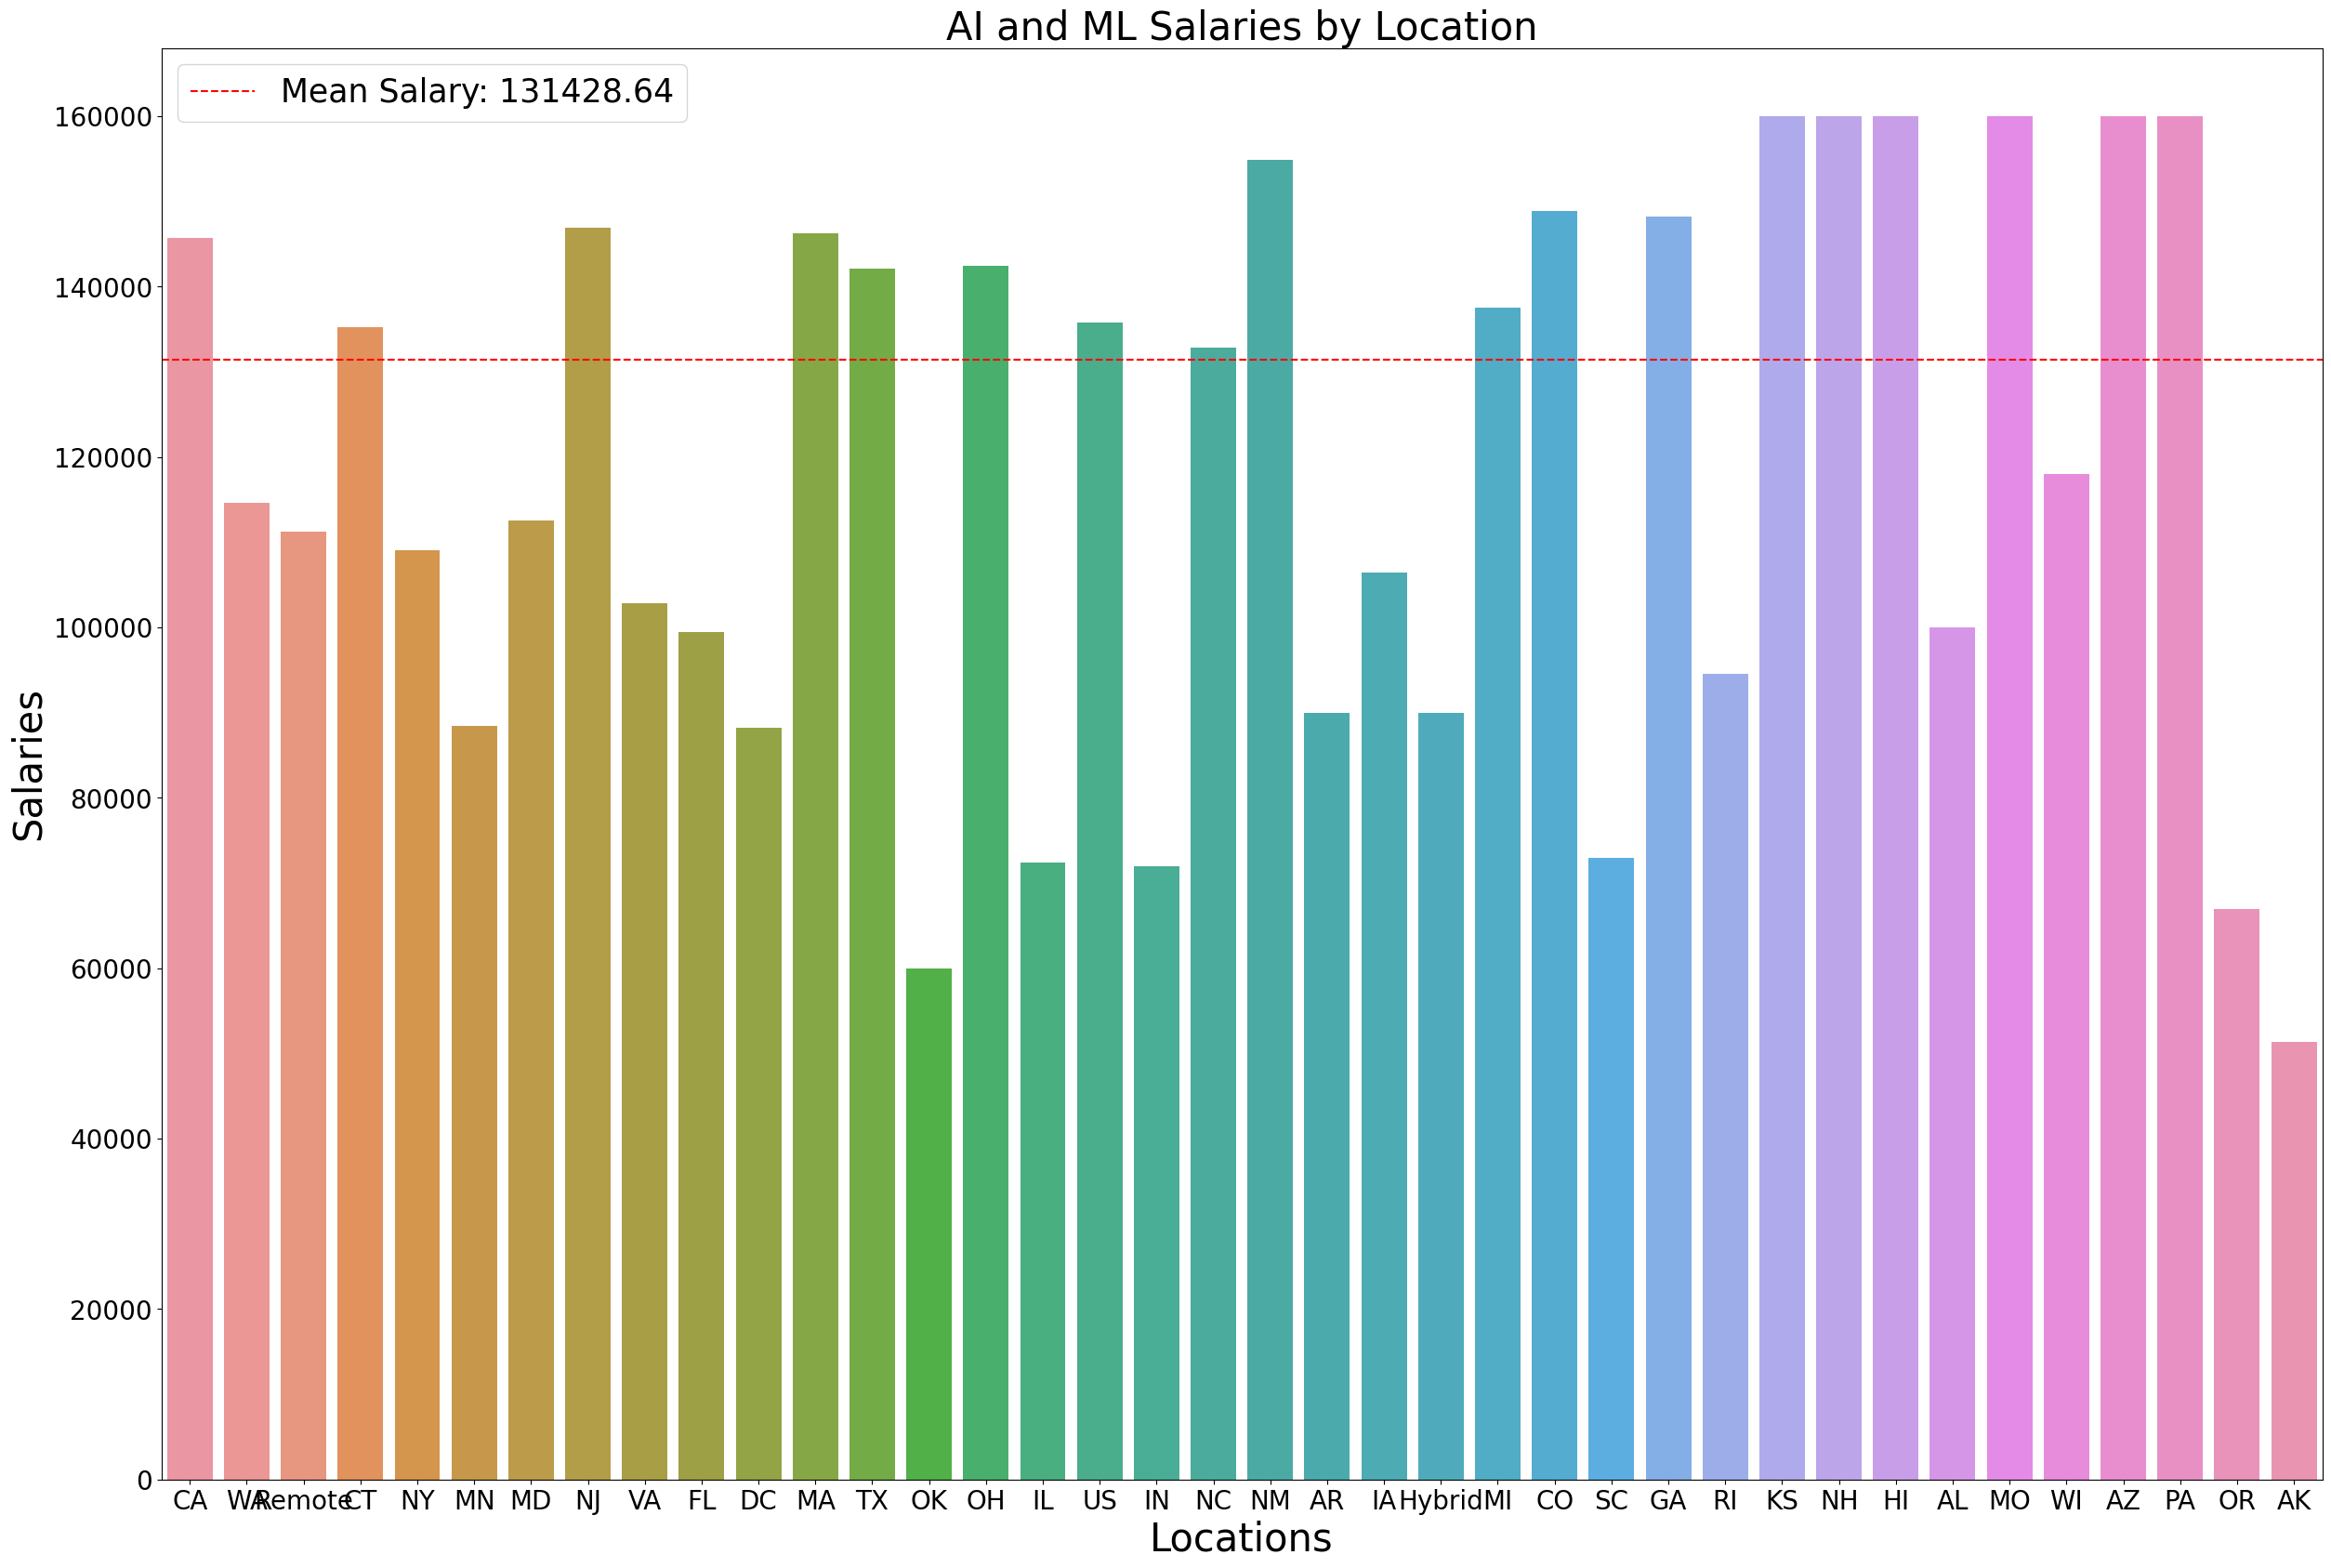

In [7]:
# Calculate the mean salary
mean_salary = jobs['Salary'].mean()

plt.figure(figsize=(30, 20))  # Adjust the figure size as needed
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Plot the bar chart
sns.barplot(x='Location', y='Salary', data=jobs, ci=None)

# Add the mean salary as a horizontal line
plt.axhline(y=mean_salary, color='r', linestyle='--', label=f'Mean Salary: {mean_salary:.2f}')

plt.title('AI and ML Salaries by Location', fontsize=30)
plt.xlabel('Locations', fontsize=30)
plt.ylabel('Salaries', fontsize=30)

# Add a legend
plt.legend(fontsize=25)

plt.show()